In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in data**

In [2]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
df = pd.read_csv(url)

In [3]:
df = df.dropna()
dates = df['date'].drop_duplicates()

### Vaccine Progress of the 5 most and least populated states

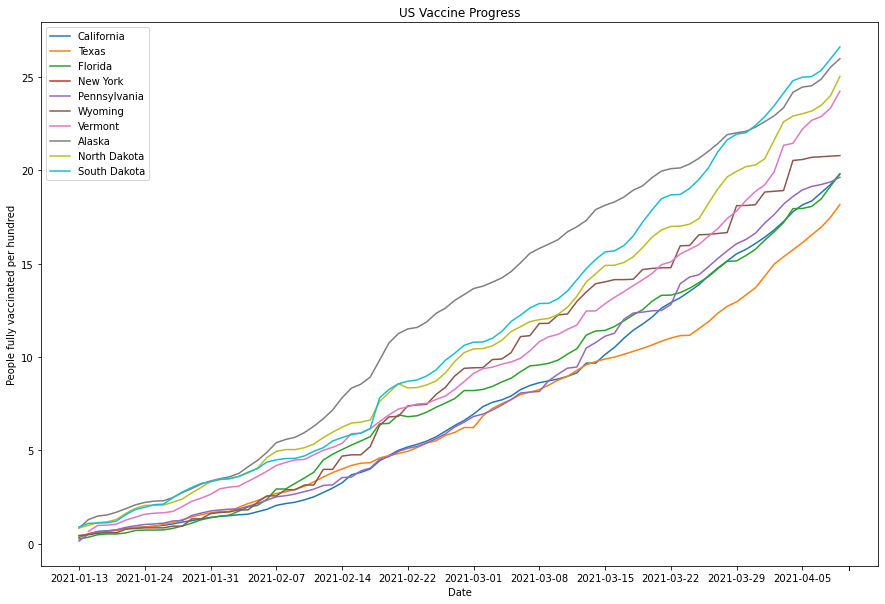

In [4]:
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Wyoming', 'Vermont', 'Alaska', 'North Dakota', 'South Dakota']

plt.figure(figsize=(15, 10))
lst = []
for state in states:
    location = df.loc[df['location'] == state]
    plt.plot(location['date'], location['people_fully_vaccinated_per_hundred'], label=state)

plt.title('US Vaccine Progress')
plt.xticks([dates.iloc[i] if i % 7 == 0 else '' for i in range(len(dates))])
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')
plt.legend(loc="upper left")
plt.show()

### Number of fully vaccinated people in each state

In [5]:
states = df['location'].drop_duplicates()
states = states.tolist()
non_states = ['Northern Mariana Islands', 'United States', 'Marshall Islands', 'American Samoa', 'District of Columbia', 'Guam', 'Federated States of Micronesia','Indian Health Svc', 'Puerto Rico', 'Republic of Palau', 'Virgin Islands']
for area in non_states:
    states.remove(area)

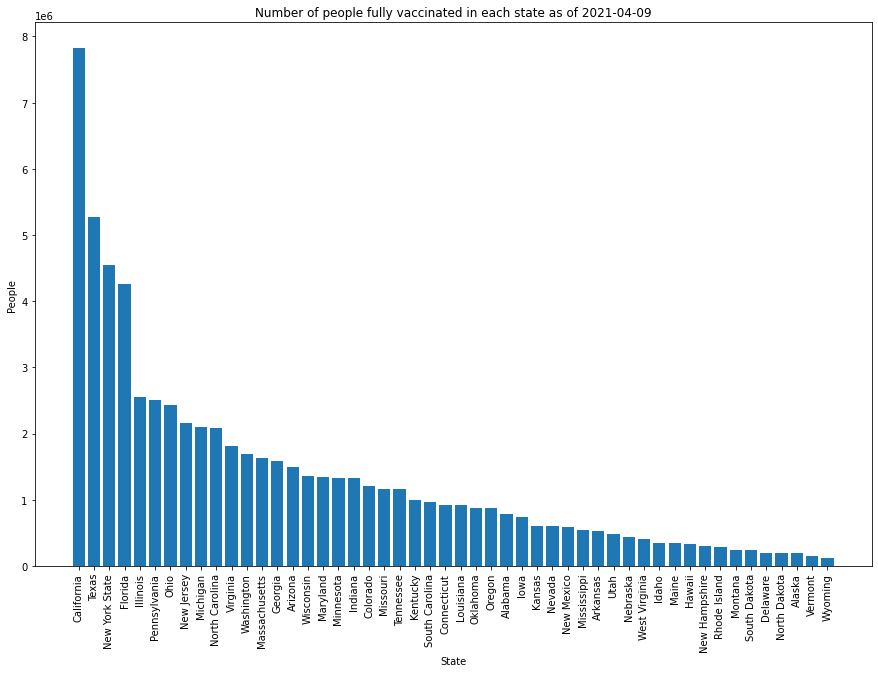

In [6]:
most_recent_date = most_recent_date = df.iloc[-1]['date']
fully_vaccinated = {}
for state in states:
    location = df.loc[df['location'] == state]
    row = location.iloc[-1]
    fully_vaccinated[state] = row['people_fully_vaccinated']
    
fully_vaccinated = {k: v for k, v in sorted(fully_vaccinated.items(), key=lambda x: x[1], reverse=True)}
plt.figure(figsize=(15, 10))
plt.bar(fully_vaccinated.keys(), fully_vaccinated.values())

plt.xticks(states, rotation=90)
plt.title(f'Number of people fully vaccinated in each state as of {most_recent_date}')
plt.xlabel('State')
plt.ylabel('People')
plt.show()

### Number of fully vaccinated people vs. partially vaccinated people in the 10 most populated states

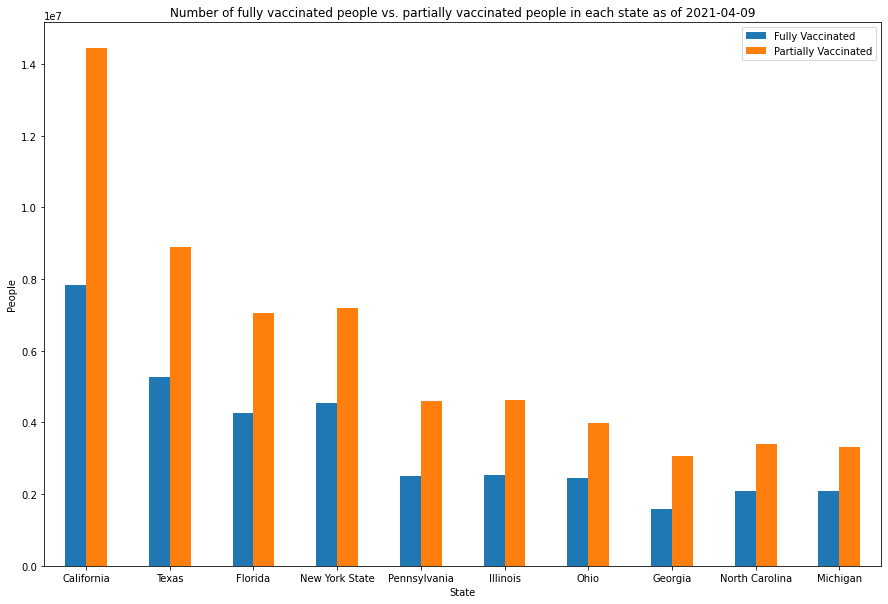

In [7]:
states = ['California', 'Texas', 'Florida', 'New York State', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']
x1 = [] # fully vaccinated
x2 = [] # partially vaccinated
for state in states:
    location = df.loc[df['location'] == state]
    row = location.iloc[-1]
    x1.append(row['people_fully_vaccinated'])
    x2.append(row['people_vaccinated'])
    
combined = pd.DataFrame({"Fully Vaccinated": x1, "Partially Vaccinated": x2}, index=states)
combined.plot.bar(figsize=(15, 10), rot=0)

plt.title(f'Number of fully vaccinated people vs. partially vaccinated people in each state as of {most_recent_date}')
plt.xlabel('State')
plt.ylabel('People')
plt.show()